In [22]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

from qiskit.visualization import *
from qiskit.quantum_info import Statevector

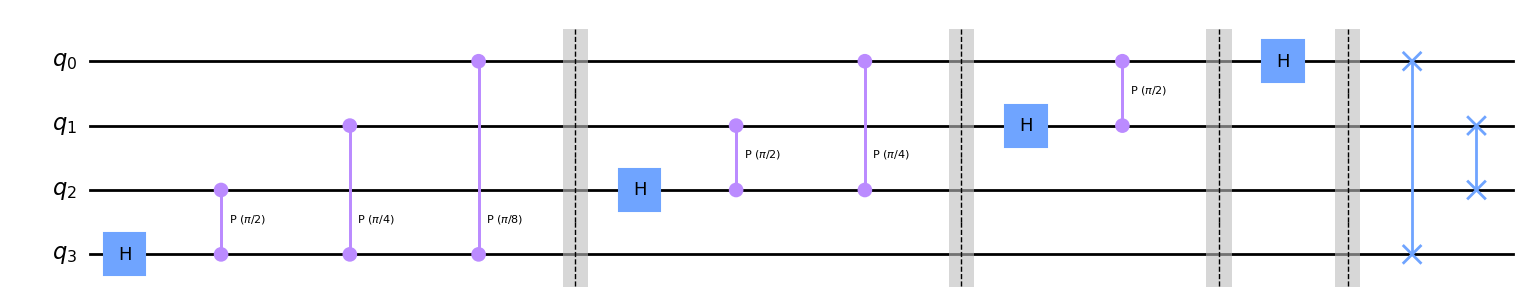

In [26]:
# defining pi value for the controlled phase gates
pi = np.pi

num_qubits = 4
qftc = QuantumCircuit(num_qubits, name="QFT")

# start with the last qubit by adding hadamard to add the gates.
for i in range(num_qubits-1, -1, -1):
    qftc.h(i)
    # qftc.barrier()
    k=1
    for j in range(i):
        qftc.cp((pi/2**k),i-j-1, i)
        k+=1
    qftc.barrier()

#  then use swap gates so that the last qubit swaps with the first, 
# the second last swaps with second, and so on
for i in range(int(num_qubits/2)):
    qftc.swap(i, num_qubits-i-1)


display(qftc.draw('mpl'))

                      



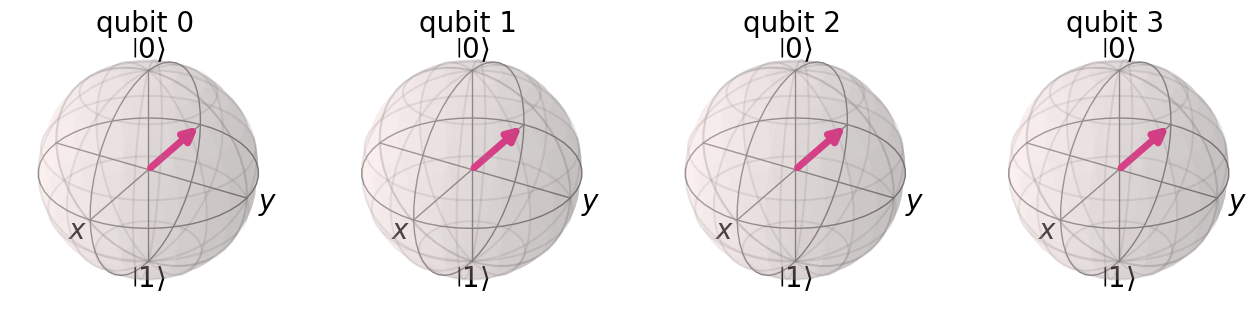

In [34]:
# Here we can see the initial state and then we see the evolution of those states 
# after applying quantum fourier transform

state_vec = Statevector.from_label('----')
plot_bloch_multivector(state_vec)

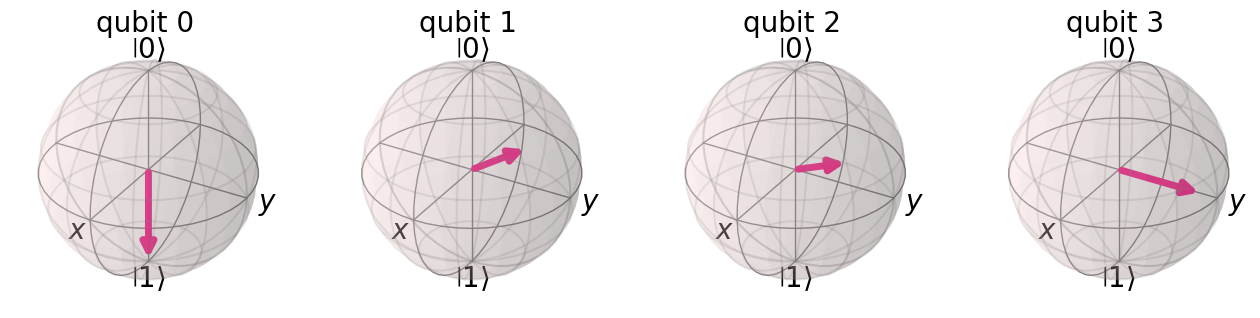

In [35]:
# evolving the state vector into a new state

# see that the previous state is in 0000 and qft transform into ++++ state
state_vec_evolve = state_vec.evolve(qftc)
plot_bloch_multivector(state_vec_evolve)

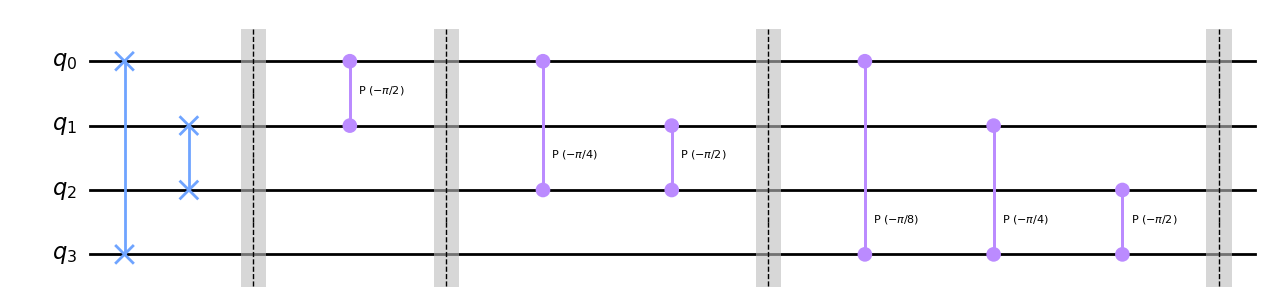

In [40]:
# Now lets do the inverse quantum fourier transform

# We need to apply the same sets of gates to a circuit in a reverse order

num_qubits = 4
iqftc = QuantumCircuit(num_qubits, name="IQFT")

for i in range(int(num_qubits/2)):
    iqftc.swap(i, num_qubits-i-1)

# iqftc.barrier()

for i in range(num_qubits):
    k = i+1
    for j in range(i):
        k-=1
        iqftc.cp(-pi/(2**k), j, i)
    iqftc.barrier()    

display(iqftc.draw('mpl'))


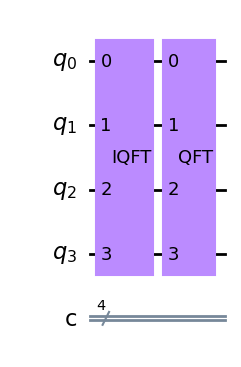

In [42]:
#   To check if the IQFT * QFT gives identity

num_qubits = 4
iden = QuantumCircuit(num_qubits, num_qubits, name = "IQFT QFT")
iden.append(iqftc, range(num_qubits))
iden.append(qftc, range(num_qubits))

display(iden.draw('mpl'))

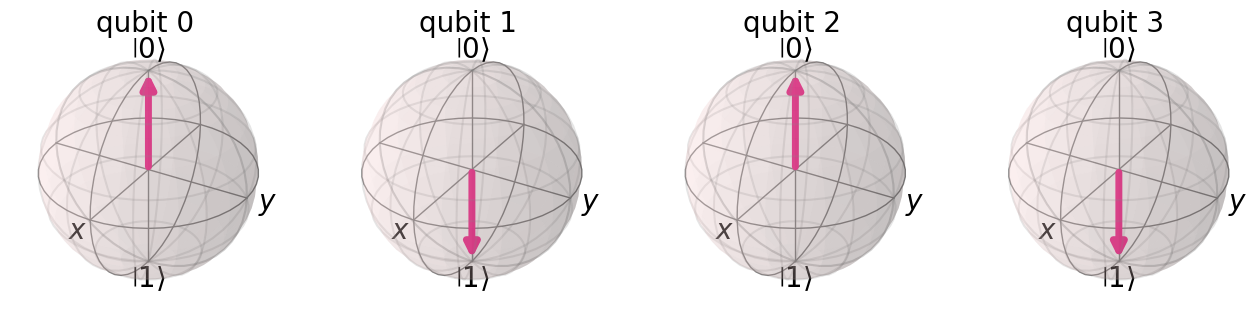

In [44]:
# now use the identity circuit to make sure that it is actually an indentity matrix. 
# If it does not change any state then it is identity

state_vec = Statevector.from_label('1010')
plot_bloch_multivector(state_vec)

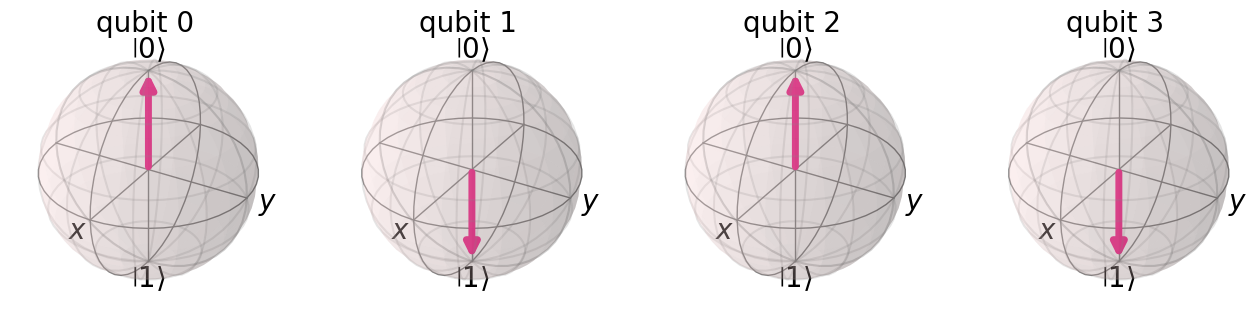

In [45]:
# after evolving the initial stte with iden, the evolved state remains unchanged which confirms that
# IQFT*QFT is indeed identity

state_vec_evolve = state_vec.evolve(iden)
plot_bloch_multivector(state_vec)

Note that the post processing of QFT circuits after measurement has added complexity because it requires us to use classical computer. If we were to just consider the quantum operations, it definitely has advantage over classical computers, however, the post processing part makes it not significantly faster than classical counterpart